# Titanic Survival Prediction

We will work with the Titanic data set from Kaggle and try to predict a classification- survival or deceased for any onboard passenger.

Link to data set: https://www.kaggle.com/c/titanic

It has non-numerical features such as "Name", "Sex", "Ticket", "Cabin", "Embarked".

The numerical features in the data set are:
- "Survived": 1 If Survived, else 0
- "Pclass": Passenger Class
- "Age": Age of passesnger
- "Fare": Price of the ticket, the corresponding passenger paid.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading & Formatting Data

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Checking for missing data

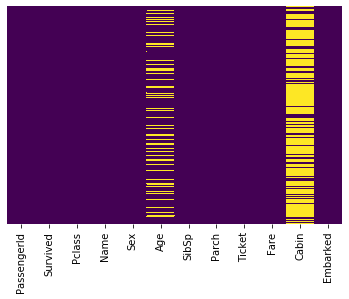

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

"Age" & "Cabin" data missing.

#### Adding "Age" data

I will fill the missing age data with average of the average age of the corresponding class.

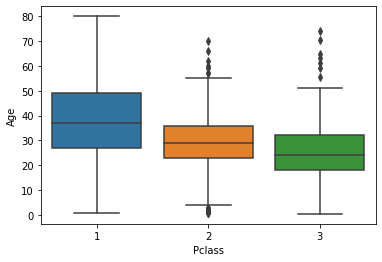

In [5]:
sns.boxplot(x='Pclass', y='Age', data=train)

- Average age of Pclass '1' is around 38.
- Average age of Pclass '2' is around 29.
- Average age of Pclass '3' is around 24.

In [6]:
def update_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if (Pclass == 1):
            return 38
        elif (Pclass == 2):
            return 29
        else:
            return 24
    else:
        return Age

In [7]:
train['Age'] = train[['Age','Pclass']].apply(update_age,axis=1)

Since cabin data has too much missing value, we will drop the feature.

In [9]:
train.drop('Cabin',axis=1,inplace=True)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Exploratory Data Analysis

#### Pairplot to visualise the numerical features of datset, colored on the basis of Survival

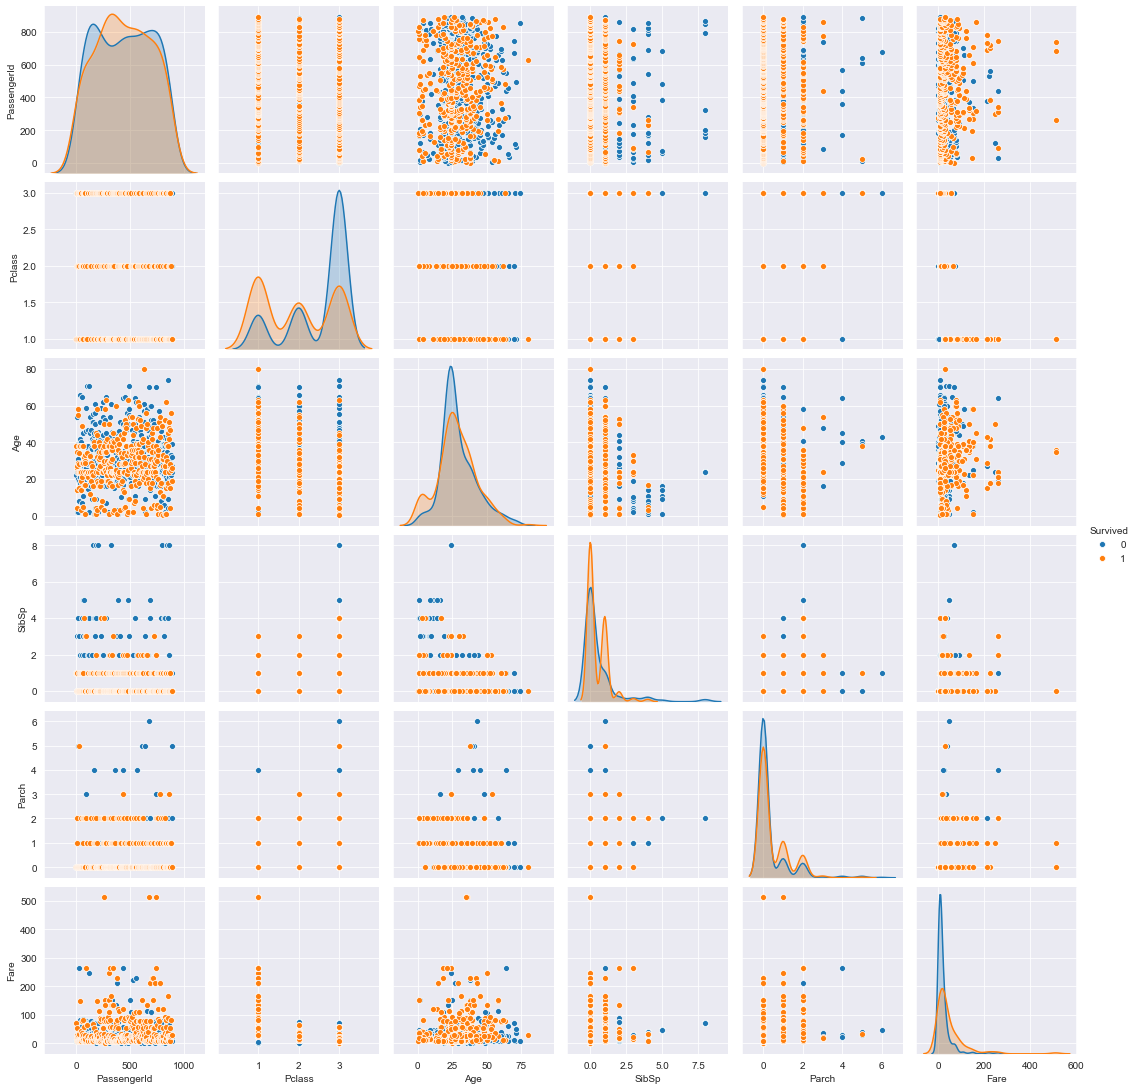

In [23]:
sns.pairplot(train,hue='Survived')
sns.set_style('dark')

#### plot to visualize survival based on sex

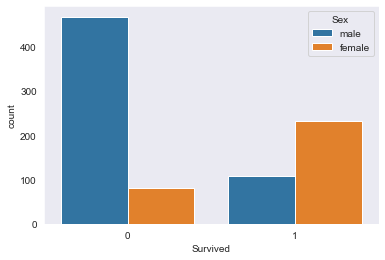

In [29]:
sns.countplot(x='Survived',hue='Sex',data=train)

It can be easily visualized that a female passenger has more survival probability than a male passenger.

- Since 'Sex' has significant impact on the survival, these features should be converted to numerical values for training the model.

#### plot to visualize survival based on property 'Embarked'

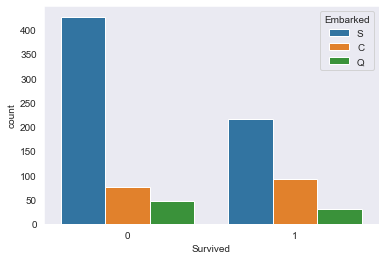

In [26]:
sns.countplot(x='Survived',hue='Embarked',data=train)

### Converting categorical values to indicator variables

In [28]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [31]:
train.drop('PassengerId',axis=1,inplace=True)

In [32]:
train = pd.concat([train,sex],axis = 1)

In [33]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [39]:
X = train.drop(['Survived','Name','Sex','Ticket','Embarked'],axis = 1)

In [40]:
Y = train['Survived']

### Spliting train and test set of data and modeling

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

### Training the Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
myModel = LogisticRegression()

In [45]:
myModel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [47]:
y_predicted = myModel.predict(x_test)

### Evaluation of model

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       169
           1       0.80      0.69      0.74       126

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [50]:
print(confusion_matrix(y_test, y_predicted))

[[147  22]
 [ 39  87]]
